In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CO2 emission of cars.csv')

In [3]:
data.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


In [4]:
data = data.drop(columns='Unnamed: 5')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [6]:
# volume = рабочий объем двигателя


In [7]:
data.columns = data.columns.str.lower()

In [8]:
data

,car,model,volume,weight,co2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [9]:
data['car'].unique()

array(['Toyota', 'Mitsubishi', 'Skoda', 'Fiat', 'Mini', 'VW', 'Mercedes',
       'Ford', 'Audi', 'Hyundai', 'Suzuki', 'Honda', 'Hundai', 'Opel',
       'BMW', 'Mazda', 'Volvo'], dtype=object)

In [10]:
data['car'].nunique() #из 35 

17

In [11]:
data.describe()

,volume,weight,co2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [12]:
data.corr()

,volume,weight,co2
volume,1.000000,0.753537,0.592082
weight,0.753537,1.000000,0.552150
co2,0.592082,0.552150,1.000000


<AxesSubplot:>

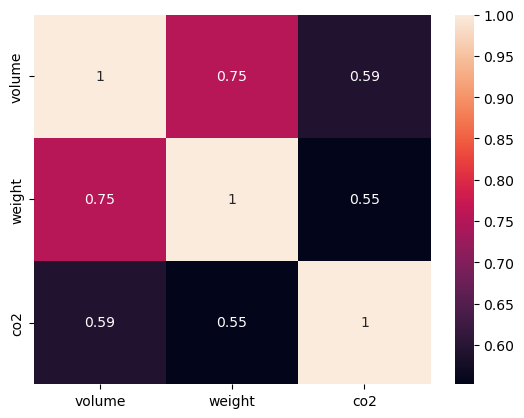

In [13]:
sns.heatmap(data.corr(), annot=True)

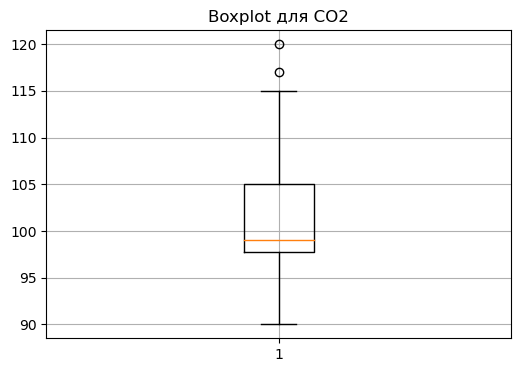

In [14]:
plt.figure(figsize=(6, 4))
plt.boxplot(data['co2'])
plt.title('Boxplot для CO2')
plt.grid(True)
plt.show()

In [15]:
data_sorted = data.sort_values(by='co2', ascending=False)
data_sorted.head()

,car,model,volume,weight,co2
35,Mercedes,SLK,2500,1395,120
31,Volvo,XC70,2000,1746,117
30,Mercedes,E-Class,2100,1605,115
29,BMW,5,2000,1705,114
27,Audi,A6,2000,1725,114


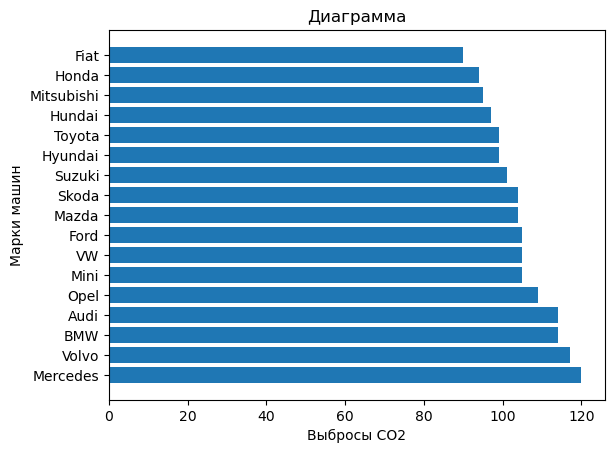

In [16]:
# Строим диаграмму
plt.barh(data_sorted['car'], data_sorted['co2'])

# Настройки графика
plt.xlabel('Выбросы CO2')  # Название оси x
plt.ylabel('Марки машин')  # Название оси y
plt.title('Диаграмма')  # Заголовок графика
plt.show()

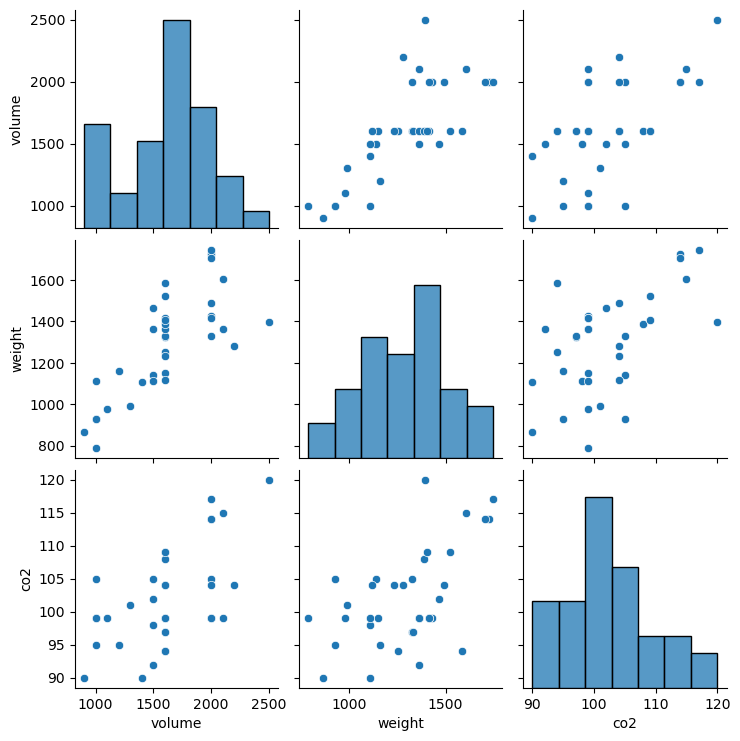

In [17]:
sns.pairplot(data)

### Модель линейной регрессии

In [18]:
# разделяем на факторы
x = data[['weight', 'volume']]
y = data['co2']

In [19]:
#разделяем данные на обучающую и валидационную выборку с random_state=13

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

In [21]:
from sklearn.linear_model import LinearRegression

#создаем модель линейной регрессии
model = LinearRegression()

#обучаем нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[2.34019963 2.00237171] 101.14285714285714


In [22]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

In [23]:
predictions = model.predict(x_test_st)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [25]:
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print()
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 35.420529395399015
Среднеквадратическая ошибка (RMSE): 5.9515148823975075
Средняя абсолютная ошибка (MAE): 4.852305182427081
Средняя абсолютная ошибка  (MAPE): 0.044978072369388715

Коэффициент детерминации (R^2): 0.333064465635323


In [26]:
n = data['co2'].count()
p = 2

In [27]:
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R^2:", r2)
print("Скорректированный R^2:", r2_adj)

R^2: 0.333064465635323
Скорректированный R^2: 0.29264413021928193


### Парная линейная регрессия

In [28]:
x = data['volume']
y = data['co2']

In [29]:
# преобразуем x  в одномерный массив Numpy, а затем добавим второе измерение
x = np.array(x).reshape(-1, 1)
 
# список y достаточно преобразовать в одномерный массив Numpy
y = np.array(y)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88) 

In [31]:
model_train = LinearRegression()

model_train.fit(x_train, y_train)

# напечатаем коэффициенты
print(model_train.coef_, model_train.intercept_)

[0.01091162] 84.50263445670544


In [32]:
y_pred_test = model_train.predict(x_test)

In [33]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)
mape = mean_absolute_percentage_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 33.819970123137
Среднеквадратическая ошибка (RMSE): 5.815493970690452
Средняя абсолютная ошибка (MAE): 5.011395267919276
Средняя абсолютная ошибка  (MAPE): 0.04722238934082171
Коэффициент детерминации (R^2): 0.36320150400683504


In [34]:
n = data['co2'].count()
p = 1

In [35]:
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R^2:", r2)
print("Скорректированный R^2:", r2_adj)

R^2: 0.36320150400683504
Скорректированный R^2: 0.3444721364776243


In [36]:
y_pred = model_train.predict(x)

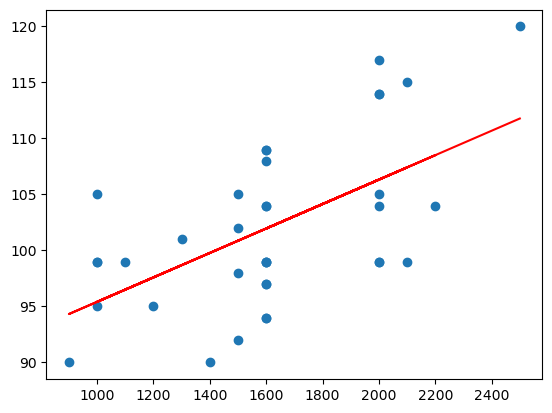

In [37]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

### Модель линейной регрессии с фиктивными переменными 
Я считаю, что в ней мало смысла, так как очень много категорий и мало данных. Но скорректированный R^2 выше всего.

In [38]:
data_car = data.drop(columns='model')
data_car

,car,volume,weight,co2
0,Toyota,1000,790,99
1,Mitsubishi,1200,1160,95
2,Skoda,1000,929,95
3,Fiat,900,865,90
4,Mini,1500,1140,105
5,VW,1000,929,105
6,Skoda,1400,1109,90
7,Mercedes,1500,1365,92
8,Ford,1500,1112,98
9,Audi,1600,1150,99


In [39]:
encoded_data = pd.get_dummies(data_car)
encoded_data

,volume,weight,co2,car_Audi,car_BMW,car_Fiat,car_Ford,car_Honda,car_Hundai,car_Hyundai,car_Mazda,car_Mercedes,car_Mini,car_Mitsubishi,car_Opel,car_Skoda,car_Suzuki,car_Toyota,car_VW,car_Volvo
0,1000,790,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1200,1160,95,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1000,929,95,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,900,865,90,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1500,1140,105,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,1000,929,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,1400,1109,90,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,1500,1365,92,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,1500,1112,98,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1600,1150,99,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

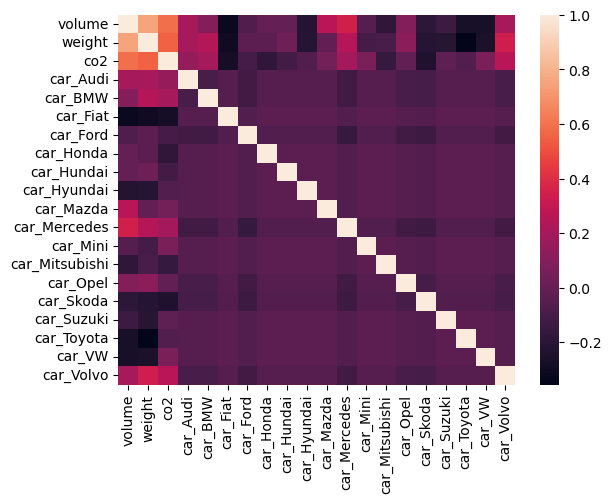

In [40]:
sns.heatmap(encoded_data.corr())

In [41]:
encoded_data.columns

Index(['volume', 'weight', 'co2', 'car_Audi', 'car_BMW', 'car_Fiat',
       'car_Ford', 'car_Honda', 'car_Hundai', 'car_Hyundai', 'car_Mazda',
       'car_Mercedes', 'car_Mini', 'car_Mitsubishi', 'car_Opel', 'car_Skoda',
       'car_Suzuki', 'car_Toyota', 'car_VW', 'car_Volvo'],
      dtype='object')

In [42]:
x = encoded_data[['volume', 'weight', 'co2', 'car_Audi', 'car_BMW', 'car_Fiat',
       'car_Ford', 'car_Honda', 'car_Hundai', 'car_Hyundai', 'car_Mazda',
       'car_Mercedes', 'car_Mini', 'car_Mitsubishi', 'car_Opel', 'car_Skoda',
       'car_Suzuki', 'car_Toyota', 'car_VW']]
y = encoded_data['co2']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88)

scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

#создаем модель линейной регрессии
model = LinearRegression()

#обучаем нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[-6.65050514e-15 -7.99360578e-15  7.12497762e+00  7.77156117e-16
  2.83106871e-15 -2.55351296e-15  3.49720253e-15  5.19029264e-15
  3.30291350e-15 -2.60902411e-15  5.88418203e-15  3.94129174e-15
  3.46944695e-18 -5.55111512e-16  1.67921232e-15  2.22044605e-15
 -1.66533454e-15 -4.77395901e-15 -4.66293670e-15] 101.14285714285714


In [44]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

predictions = model.predict(x_test_st)

In [45]:
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print()
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 2.0194839173657902e-28
Среднеквадратическая ошибка (RMSE): 1.4210854715202004e-14
Средняя абсолютная ошибка (MAE): 1.0658141036401503e-14
Средняя абсолютная ошибка  (MAPE): 9.965265252890294e-17

Коэффициент детерминации (R^2): 1.0


In [46]:
n = encoded_data['co2'].count()
p = len(encoded_data.columns) - 1

In [47]:
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R^2:", r2)
print("Скорректированный R^2:", r2_adj)

R^2: 1.0
Скорректированный R^2: 1.0


### Полиноминальная регрессия

In [48]:
data.head()

,car,model,volume,weight,co2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [49]:
x = data[['volume', 'weight']]
y = data['co2']

In [50]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

In [51]:
x_poly = poly_features.fit_transform(x)

x_poly_train, x_poly_test, y_train, y_test = train_test_split(x_poly, y, train_size=0.2, random_state=88)

poly_reg = LinearRegression()
poly_reg.fit(x_poly_train, y_train)

y_poly_pred = poly_reg.predict(x_poly_test)

In [52]:
mse = mean_squared_error(y_test, y_poly_pred)
rmse = mean_squared_error(y_test, y_poly_pred, squared=False)
mae = mean_absolute_error(y_test, y_poly_pred)
mape = mean_absolute_percentage_error(y_test, y_poly_pred)
r2 = r2_score(y_test, y_poly_pred)

print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print()
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 277.55911764452736
Среднеквадратическая ошибка (RMSE): 16.660105571229956
Средняя абсолютная ошибка (MAE): 10.317750383975703
Средняя абсолютная ошибка  (MAPE): 0.09888471666804534

Коэффициент детерминации (R^2): -3.984778720830433


In [53]:
n = data['co2'].count()
p = 6

r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R^2:", r2)
print("Скорректированный R^2:", r2_adj)

R^2: -3.984778720830433
Скорректированный R^2: -5.016112249278109


**возможно, проблема именно в том, что датасет слишком маленкий**
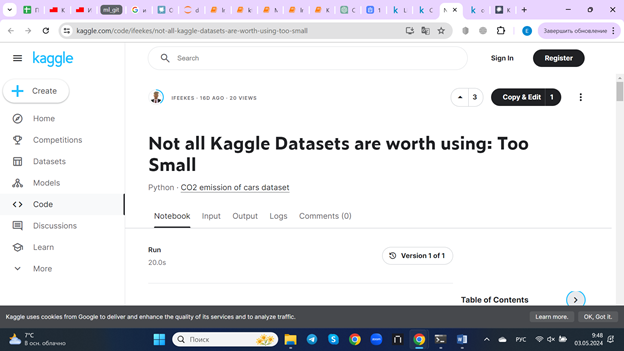

# Преобразование датафрейма: 
### добавление столбца со страной происхождения автомобиля

In [54]:
data['car'].unique()

array(['Toyota', 'Mitsubishi', 'Skoda', 'Fiat', 'Mini', 'VW', 'Mercedes',
       'Ford', 'Audi', 'Hyundai', 'Suzuki', 'Honda', 'Hundai', 'Opel',
       'BMW', 'Mazda', 'Volvo'], dtype=object)

In [55]:
df_dict = {
        'car': [
            'Toyota', 
            'Mitsubishi', 
            'Skoda', 
            'Fiat', 
            'Mini', 
            'VW', 
            'Mercedes',
            'Ford', 
            'Audi', 
            'Hyundai', 
            'Suzuki', 
            'Honda', 
            'Hundai', 
            'Opel',
            'BMW', 
            'Mazda', 
            'Volvo'
        ],
        'country': [
            'Japan',  # Toyota, Mitsubishi, Suzuki, Honda, Mazda
            'Japan',  # Mitsubishi
            'Czech Republic',  # Skoda
            'Italy',  # Fiat
            'UK',  # Mini
            'Germany',  # VW, Mercedes, BMW, Audi, Opel
            'Germany',  # Mercedes, Audi, BMW
            'USA',  # Ford
            'Germany',  # Audi, BMW, Mercedes
            'South Korea',  # Hyundai
            'Japan',  # Suzuki, Mazda
            'Japan',  # Honda, Mazda
            'South Korea',  # Hyundai
            'Germany',  # Opel, BMW
            'Germany',  # BMW
            'Japan',  # Mazda
            'Sweden'  # Volvo
        ]
    }

# Создание датафрейма из словаря
country_df = pd.DataFrame(df_dict)

# Вывод датафрейма
country_df

,car,country
0,Toyota,Japan
1,Mitsubishi,Japan
2,Skoda,Czech Republic
3,Fiat,Italy
4,Mini,UK
5,VW,Germany
6,Mercedes,Germany
7,Ford,USA
8,Audi,Germany
9,Hyundai,South Korea


In [56]:
data.head()

,car,model,volume,weight,co2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [57]:
merged_df = pd.merge(data, country_df, on='car', how='left')
merged_df

,car,model,volume,weight,co2,country
0,Toyota,Aygo,1000,790,99,Japan
1,Mitsubishi,Space Star,1200,1160,95,Japan
2,Skoda,Citigo,1000,929,95,Czech Republic
3,Fiat,500,900,865,90,Italy
4,Mini,Cooper,1500,1140,105,UK
5,VW,Up!,1000,929,105,Germany
6,Skoda,Fabia,1400,1109,90,Czech Republic
7,Mercedes,A-Class,1500,1365,92,Germany
8,Ford,Fiesta,1500,1112,98,USA
9,Audi,A1,1600,1150,99,Germany


In [58]:
merged_df['country'].nunique()

8

In [59]:
data_only_country = merged_df.drop(columns=['model', 'car'])
data_only_country

,volume,weight,co2,country
0,1000,790,99,Japan
1,1200,1160,95,Japan
2,1000,929,95,Czech Republic
3,900,865,90,Italy
4,1500,1140,105,UK
5,1000,929,105,Germany
6,1400,1109,90,Czech Republic
7,1500,1365,92,Germany
8,1500,1112,98,USA
9,1600,1150,99,Germany


In [60]:
encoded_data_country = pd.get_dummies(data_only_country)
encoded_data_country.head()

,volume,weight,co2,country_Czech Republic,country_Germany,country_Italy,country_Japan,country_South Korea,country_Sweden,country_UK,country_USA
0,1000,790,99,0,0,0,1,0,0,0,0
1,1200,1160,95,0,0,0,1,0,0,0,0
2,1000,929,95,1,0,0,0,0,0,0,0
3,900,865,90,0,0,1,0,0,0,0,0
4,1500,1140,105,0,0,0,0,0,0,1,0


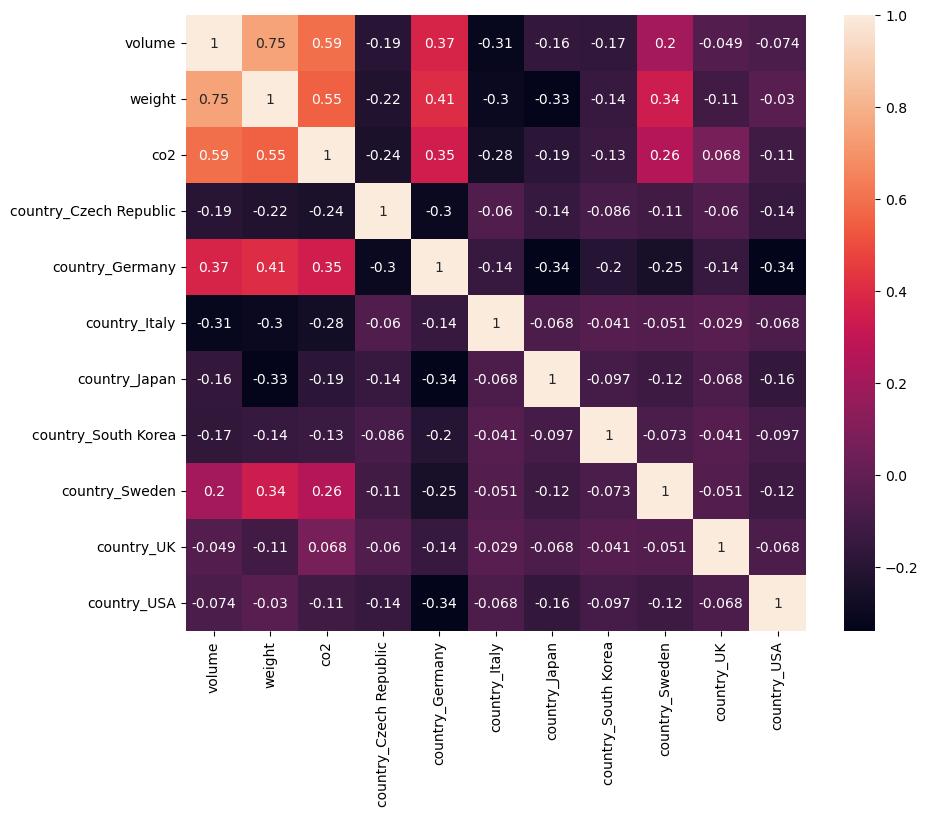

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(encoded_data_country.corr(), annot=True)
plt.show()

In [62]:
encoded_data_country.columns

Index(['volume', 'weight', 'co2', 'country_Czech Republic', 'country_Germany',
       'country_Italy', 'country_Japan', 'country_South Korea',
       'country_Sweden', 'country_UK', 'country_USA'],
      dtype='object')

In [70]:
x = encoded_data_country[['volume', 'weight', 'country_Czech Republic', 'country_Germany',
       'country_Italy', 'country_Japan', 'country_South Korea',
       'country_Sweden', 'country_UK']]
y = encoded_data_country['co2']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88)

scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

#создаем модель линейной регрессии
model = LinearRegression()

#обучаем нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[ 1.97561     0.45293163 -1.22673359  1.89672795 -1.06063338 -0.24018274
 -0.18761946  1.85638606  1.01476246] 101.14285714285714


In [72]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

predictions = model.predict(x_test_st)

In [73]:
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print()
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 48.62799050981863
Среднеквадратическая ошибка (RMSE): 6.97337726713668
Средняя абсолютная ошибка (MAE): 6.4845373300301645
Средняя абсолютная ошибка  (MAPE): 0.06140175403240436

Коэффициент детерминации (R^2): 0.08438029048885187


In [74]:
len(encoded_data_country.columns)

11

In [75]:
n = encoded_data_country['co2'].count()
p = 9

r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R^2:", r2)
print("Скорректированный R^2:", r2_adj)

R^2: 0.08438029048885187
Скорректированный R^2: -0.23256499357269944


тоже качество модели оставляет желать лучшего